In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
df.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df['Age'] = sc.fit_transform(df[['Age']])
df['Income($)'] = sc.fit_transform(df[['Income($)']])



In [9]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [16]:
from sklearn.cluster import KMeans
a = []
b = range(1,10)
for i in b:
    km = KMeans(n_clusters=i)
    km.fit(df[['Age','Income($)']])
    a.append(km.inertia_)

    
    

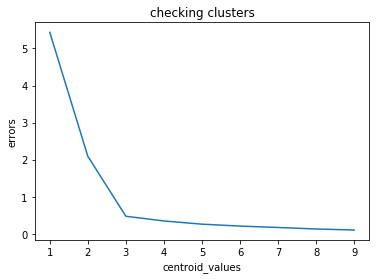

In [17]:
plt.xlabel('centroid_values')
plt.ylabel('errors')
plt.title('checking clusters')
plt.plot(b,a)


In [18]:
# k=3

In [19]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [20]:
reg = KMeans(n_clusters=3)
reg.fit(df[['Age','Income($)']])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
y_pred = reg.predict(df[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [22]:
df['assigned_values'] = y_pred

In [23]:
df.head()

,Name,Age,Income($),assigned_values
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [24]:
reg.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

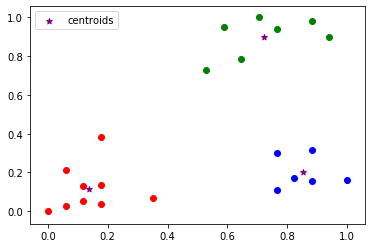

In [28]:
df1 = df[df.assigned_values==0]
df2 = df[df.assigned_values==1]
df3 = df[df.assigned_values==2]
plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='green')
plt.scatter(df3['Age'],df3['Income($)'],color='blue')
plt.scatter(reg.cluster_centers_[:,0],reg.cluster_centers_[:,1],color='purple',marker='*',label='centroids')
plt.legend()